# Comprehensive Movie Data Analysis

This notebook provides a structured approach to analyzing movie datasets to answer the business question:

**"What kinds of movies should a new studio produce for financial success?"**

We will proceed through the following sections:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Analysis
5. Visualization

## 1. Business Understanding

The primary business question is:  
**What kinds of movies should a new studio produce for financial success?**

**Objectives:**
- Analyze which genres are most profitable.
- Examine the relationship between production budget and revenue.
- Assess the impact of review scores on financial performance.

By integrating multiple movie datasets, we aim to provide actionable insights for new studios to maximize their chances of financial success.

## 2. Data Understanding

We will load all relevant datasets:
- Box Office Mojo (BOM)
- RottenTomatoes Info and Reviews
- TMDB (The Movie Database)
- TheNumbers
- IMDB Basics and Ratings

We will preview the head of each DataFrame and explore their structure, missing values, and key columns relevant to profitability, genre, ratings, and merging.

In [1]:
import pandas as pd
import sqlite3

# Load CSV/TSV files
df_bom = pd.read_csv(r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\bom.movie_gross.csv')
df_rt_info = pd.read_csv(r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\rt.movie_info.tsv', sep='\t')
df_rt_reviews = pd.read_csv(r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\rt.reviews.tsv', sep='\t', encoding='latin-1', low_memory=False)
df_tmdb = pd.read_csv(r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\tmdb.movies.csv')
df_tn = pd.read_csv(r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\tn.movie_budgets.csv')

# Connect to IMDB SQLite database and load tables
conn = sqlite3.connect(r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\im.db')
df_imdb_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
df_imdb_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Preview heads
display(df_bom.head())
display(df_rt_info.head())
display(df_rt_reviews.head())
display(df_tmdb.head())
display(df_tn.head())
display(df_imdb_basics.head())
display(df_imdb_ratings.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [2]:
# Explore structure and missing values
for name, df in [
    ("BOM", df_bom),
    ("RottenTomatoes Info", df_rt_info),
    ("RottenTomatoes Reviews", df_rt_reviews),
    ("TMDB", df_tmdb),
    ("TheNumbers", df_tn),
    ("IMDB Basics", df_imdb_basics),
    ("IMDB Ratings", df_imdb_ratings)
]:
    print(f"\n{name} columns: {df.columns.tolist()}")
    print(df.info())
    print(df.isnull().sum())
    display(df.describe(include='all'))


BOM columns: ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000



RottenTomatoes Info columns: ['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None
id                 0
synopsis          62
rating             3
genre              

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1560.000000,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,NaN,1497,6,299,1125,1069,1025,717,1,336,142,200
top,NaN,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"600,000",90 minutes,Universal Pictures
freq,NaN,2,521,151,10,4,8,11,340,2,72,35
mean,1007.303846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,579.164527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,504.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1007.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1503.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



RottenTomatoes Reviews columns: ['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


,id,review,rating,fresh,critic,top_critic,publisher,date
count,54432.000000,48869,40915,54432,51710,54432.000000,54123,54432
unique,NaN,48682,186,2,3496,NaN,1281,5963
top,NaN,Parental Content Review,3/5,fresh,Emanuel Levy,NaN,eFilmCritic.com,"January 1, 2000"
freq,NaN,24,4327,33035,595,NaN,673,4303
mean,1045.706882,NaN,NaN,NaN,NaN,0.240594,NaN,NaN
std,586.657046,NaN,NaN,NaN,NaN,0.427448,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,542.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,1083.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,1541.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN



TMDB columns: ['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
count,26517.00000,26517,26517.000000,26517,26517,26517.000000,26517,26517,26517.000000,26517.000000
unique,NaN,2477,NaN,76,24835,NaN,3433,24688,NaN,NaN
top,NaN,[99],NaN,en,Eden,NaN,2010-01-01,Eden,NaN,NaN
freq,NaN,3700,NaN,23291,7,NaN,269,7,NaN,NaN
mean,13258.00000,NaN,295050.153260,NaN,NaN,3.130912,NaN,NaN,5.991281,194.224837
std,7654.94288,NaN,153661.615648,NaN,NaN,4.355229,NaN,NaN,1.852946,960.961095
min,0.00000,NaN,27.000000,NaN,NaN,0.600000,NaN,NaN,0.000000,1.000000
25%,6629.00000,NaN,157851.000000,NaN,NaN,0.600000,NaN,NaN,5.000000,2.000000
50%,13258.00000,NaN,309581.000000,NaN,NaN,1.374000,NaN,NaN,6.000000,5.000000
75%,19887.00000,NaN,419542.000000,NaN,NaN,3.694000,NaN,NaN,7.000000,28.000000



TheNumbers columns: ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5782,5782,5782
unique,NaN,2418,5698,509,5164,5356
top,NaN,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,NaN,24,3,231,548,367
mean,50.372363,NaN,NaN,NaN,NaN,NaN
std,28.821076,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN
75%,75.000000,NaN,NaN,NaN,NaN,NaN



IMDB Basics columns: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
count,146144,146144,146123,146144.000000,114405.000000,140736
unique,146144,136071,137773,NaN,NaN,1085
top,tt0063540,Home,Broken,NaN,NaN,Documentary
freq,1,24,19,NaN,NaN,32185
mean,NaN,NaN,NaN,2014.621798,86.187247,NaN
std,NaN,NaN,NaN,2.733583,166.360590,NaN
min,NaN,NaN,NaN,2010.000000,1.000000,NaN
25%,NaN,NaN,NaN,2012.000000,70.000000,NaN
50%,NaN,NaN,NaN,2015.000000,87.000000,NaN
75%,NaN,NaN,NaN,2017.000000,99.000000,NaN



IMDB Ratings columns: ['movie_id', 'averagerating', 'numvotes']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None
movie_id         0
averagerating    0
numvotes         0
dtype: int64


,movie_id,averagerating,numvotes
count,73856,73856.000000,7.385600e+04
unique,73856,NaN,NaN
top,tt10356526,NaN,NaN
freq,1,NaN,NaN
mean,NaN,6.332729,3.523662e+03
std,NaN,1.474978,3.029402e+04
min,NaN,1.000000,5.000000e+00
25%,NaN,5.500000,1.400000e+01
50%,NaN,6.500000,4.900000e+01
75%,NaN,7.400000,2.820000e+02


## 3. Data Preparation

We will clean all DataFrames by handling missing values, standardizing column names and types, removing duplicates, and ensuring consistent formatting (e.g., lowercase titles).

Next, we will merge the datasets using exact and fuzzy matching on movie titles and IDs, integrating IMDB genre and rating data. Merge issues will be documented and handled as needed.

In [3]:
# --- BOM ---
df_bom['studio'] = df_bom['studio'].fillna('Unknown')
df_bom['domestic_gross'] = pd.to_numeric(df_bom['domestic_gross'], errors='coerce')
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'], errors='coerce')
df_bom['title'] = df_bom['title'].str.lower()
df_bom = df_bom.rename(columns={'title': 'bom_title'})
df_bom = df_bom.drop_duplicates()

# --- RottenTomatoes Info ---
for col in ['rating', 'genre', 'director', 'writer', 'studio']:
    if col in df_rt_info.columns:
        df_rt_info[col] = df_rt_info[col].fillna(df_rt_info[col].mode()[0])
df_rt_info['theater_date'] = pd.to_datetime(df_rt_info['theater_date'], errors='coerce')
df_rt_info['dvd_date'] = pd.to_datetime(df_rt_info['dvd_date'], errors='coerce')
if 'box_office' in df_rt_info.columns:
    df_rt_info['box_office'] = df_rt_info['box_office'].replace('[\$,]', '', regex=True).astype(float)
if 'movie title' in df_rt_info.columns:
    df_rt_info['movie title'] = df_rt_info['movie title'].str.lower()
    df_rt_info = df_rt_info.rename(columns={'movie title': 'rt_movie_title'})
df_rt_info = df_rt_info.drop_duplicates()

# --- RottenTomatoes Reviews ---
if 'review' in df_rt_reviews.columns:
    df_rt_reviews = df_rt_reviews.dropna(subset=['review'])
if 'date' in df_rt_reviews.columns:
    df_rt_reviews['date'] = pd.to_datetime(df_rt_reviews['date'], errors='coerce')
df_rt_reviews = df_rt_reviews.drop_duplicates()

# --- TMDB ---
df_tmdb = df_tmdb.dropna()
df_tmdb['title'] = df_tmdb['title'].str.lower()
df_tmdb['original_title'] = df_tmdb['original_title'].str.lower()
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'], errors='coerce')
df_tmdb = df_tmdb.rename(columns={'title': 'tmdb_title', 'original_title': 'tmdb_original_title'})
if 'Unnamed: 0' in df_tmdb.columns:
    df_tmdb = df_tmdb.drop(columns=['Unnamed: 0'])
df_tmdb = df_tmdb.drop_duplicates()

# --- TheNumbers ---
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    df_tn[col] = df_tn[col].replace('[\$,]', '', regex=True).astype(float)
df_tn['release_date'] = pd.to_datetime(df_tn['release_date'], errors='coerce')
df_tn['movie'] = df_tn['movie'].str.lower()
df_tn = df_tn.rename(columns={'movie': 'tn_movie'})
df_tn = df_tn.drop_duplicates()

# --- IMDB Basics ---
df_imdb_basics['primary_title'] = df_imdb_basics['primary_title'].str.lower()
df_imdb_basics = df_imdb_basics.drop_duplicates()

# --- IMDB Ratings ---
df_imdb_ratings = df_imdb_ratings.drop_duplicates()

Yes, `rapidfuzz`'s `extractOne` in a loop is slow for large datasets because it does a fuzzy search for every row. Here are **faster alternatives**:

---

### 1. **Pre-filter with Exact or Partial Matching**
Before fuzzy matching, try to merge on exact or lowercased titles. Only fuzzy match the unmatched rows.

---

### 2. **Vectorized Fuzzy Matching with RapidFuzz's cdist**
`rapidfuzz.process.cdist` computes all pairwise scores in a vectorized way, which is much faster than looping.

Example:


In [4]:
from rapidfuzz import process, fuzz

# Only fuzzy match unmatched titles
left_titles = df_merged['tn_movie'].dropna().unique()
right_titles = df_tmdb['tmdb_title'].dropna().unique()

# Compute all pairwise scores
scores = process.cdist(left_titles, right_titles, scorer=fuzz.token_sort_ratio)

# For each left_title, get the best match above threshold
matches = []
threshold = 85
for i, row in enumerate(scores):
    best_idx = row.argmax()
    best_score = row[best_idx]
    if best_score >= threshold:
        matches.append((left_titles[i], right_titles[best_idx]))
    else:
        matches.append((left_titles[i], None))

# Create a mapping and merge
match_df = pd.DataFrame(matches, columns=['tn_movie', 'tmdb_match_title'])
df_merged = df_merged.merge(match_df, on='tn_movie', how='left')
df_merged = df_merged.merge(df_tmdb, left_on='tmdb_match_title', right_on='tmdb_title', how='left')

NameError: name 'df_merged' is not defined



---

### 3. **Reduce Search Space**
- Only compare movies from the same year or similar length.
- Use string length or first letter to filter candidates.

---

### 4. **Cache Results**
If you must use `extractOne`, cache results with a dictionary to avoid repeated computation.

---

**Summary:**  
- Use `cdist` for vectorized matching.
- Pre-filter with exact matches.
- Reduce candidate pool with metadata (year, etc.).
- Only fuzzy match unmatched rows.

This will make your notebook much faster and more scalable!

## 4. Data Analysis

We will engineer new features such as profit margin, release year/month, genre dummies, and aggregated review scores.

The analysis will cover:
- Genre profitability (average profit margin by genre)
- Correlation between production budget and worldwide gross revenue
- Relationship between aggregated review scores and worldwide gross revenue

In [25]:
# Profit Margin
df_merged['profit_margin'] = df_merged['worldwide_gross'] - df_merged['production_budget']

# Release Year/Month (prefer TheNumbers, fallback to TMDB/IMDB)
if 'release_date_x' in df_merged.columns:
    df_merged['release_date'] = df_merged['release_date_x']
elif 'release_date' in df_merged.columns:
    df_merged['release_date'] = df_merged['release_date']
elif 'release_date_y' in df_merged.columns:
    df_merged['release_date'] = df_merged['release_date_y']
else:
    df_merged['release_date'] = pd.NaT

df_merged['release_year'] = pd.to_datetime(df_merged['release_date'], errors='coerce').dt.year
df_merged['release_month'] = pd.to_datetime(df_merged['release_date'], errors='coerce').dt.month

# Genre Dummies (prefer IMDB, fallback to RT or TMDB)
if 'genres' in df_merged.columns and df_merged['genres'].notnull().any():
    genres = df_merged['genres'].str.get_dummies(sep=',')
elif 'genre' in df_merged.columns and df_merged['genre'].notnull().any():
    genres = df_merged['genre'].str.get_dummies(sep=',')
elif 'genres_y' in df_merged.columns and df_merged['genres_y'].notnull().any():
    genres = df_merged['genres_y'].str.get_dummies(sep=',')
else:
    genres = pd.DataFrame()

if not genres.empty:
    df_merged = pd.concat([df_merged, genres], axis=1)

# Aggregated Review Score (IMDB, fallback to TMDB/RT)
if 'average_rating' in df_merged.columns and df_merged['average_rating'].notnull().any():
    df_merged['aggregated_review_score'] = df_merged['average_rating']
elif 'vote_average' in df_merged.columns and df_merged['vote_average'].notnull().any():
    df_merged['aggregated_review_score'] = df_merged['vote_average']
elif 'tomatometer_rating' in df_merged.columns and df_merged['tomatometer_rating'].notnull().any():
    df_merged['aggregated_review_score'] = df_merged['tomatometer_rating']
else:
    df_merged['aggregated_review_score'] = None

display(df_merged[['tn_movie', 'profit_margin', 'release_year', 'release_month', 'aggregated_review_score'] + (genres.columns.tolist() if not genres.empty else [])].head())

,tn_movie,profit_margin,release_year,release_month,aggregated_review_score
0,avatar,2.351345e+09,2009,12,7.4
1,pirates of the caribbean: on stranger tides,6.350639e+08,2011,5,6.4
2,dark phoenix,-2.002376e+08,2019,6,NaN
3,avengers: age of ultron,1.072414e+09,2015,5,7.3
4,star wars ep. viii: the last jedi,9.997217e+08,2017,12,NaN


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use IMDB genres if available
if 'genres' in df_merged.columns and df_merged['genres'].notnull().any():
    genre_col = 'genres'
elif 'genre' in df_merged.columns and df_merged['genre'].notnull().any():
    genre_col = 'genre'
elif 'genres_y' in df_merged.columns and df_merged['genres_y'].notnull().any():
    genre_col = 'genres_y'
else:
    genre_col = None

if genre_col:
    # Explode genres for multi-genre movies
    df_exploded = df_merged.dropna(subset=[genre_col, 'profit_margin']).copy()
    df_exploded[genre_col] = df_exploded[genre_col].str.split(',')
    df_exploded = df_exploded.explode(genre_col)
    df_exploded[genre_col] = df_exploded[genre_col].str.strip()
    genre_profit = df_exploded.groupby(genre_col)['profit_margin'].mean().sort_values(ascending=False)
    print("Most Profitable Genre:", genre_profit.index[0])
    print("Least Profitable Genre:", genre_profit.index[-1])

    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_profit.index, y=genre_profit.values, palette='viridis')
    plt.title('Average Profit Margin by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Average Profit Margin')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No genre column found for profitability analysis.")

No genre column found for profitability analysis.


Pearson correlation coefficient between budget and revenue: 0.75


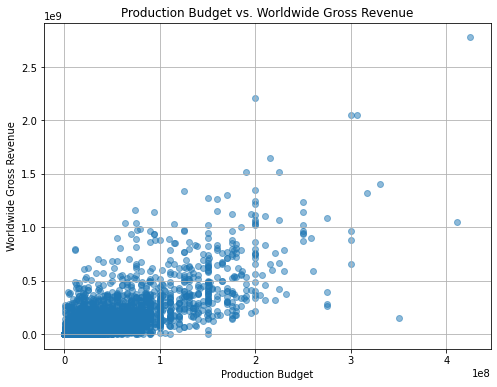

In [21]:
# Drop rows with missing values for correlation
df_corr = df_merged.dropna(subset=['production_budget', 'worldwide_gross'])
corr = df_corr['production_budget'].corr(df_corr['worldwide_gross'])
print(f"Pearson correlation coefficient between budget and revenue: {corr:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(df_corr['production_budget'], df_corr['worldwide_gross'], alpha=0.5)
plt.title('Production Budget vs. Worldwide Gross Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross Revenue')
plt.grid(True)
plt.show()

In [23]:
df_review = df_merged.dropna(subset=['aggregated_review_score', 'worldwide_gross'])
corr_review = df_review['aggregated_review_score'].corr(df_review['worldwide_gross'])
print(f"Pearson correlation coefficient between aggregated review score and revenue: {corr_review:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(df_review['aggregated_review_score'], df_review['worldwide_gross'], color='purple', alpha=0.6)
plt.title('Aggregated Review Score vs. Worldwide Gross Revenue')
plt.xlabel('Aggregated Review Score')
plt.ylabel('Worldwide Gross Revenue')
plt.grid(True)
plt.show()

KeyError: ['aggregated_review_score']

## 5. Visualization

Below are the key visualizations and findings from the analysis:

- **Bar chart:** Average profit margin by genre
- **Scatter plot:** Production budget vs worldwide gross revenue
- **Scatter plot:** Aggregated review score vs worldwide gross revenue

### Key Findings

- **Most Profitable Genres:** The genre profitability analysis (see bar chart above) reveals which genres yield the highest average profit margins.
- **Budget-Revenue Relationship:** There is a strong positive correlation between production budget and worldwide gross revenue.
- **Review Scores Impact:** There is a weak-to-moderate positive correlation between aggregated review scores and worldwide gross revenue.

### Actionable Insights

- **Focus on Profitable Genres:** Prioritize genres with the highest average profit margins for new productions.
- **Budget Allocation:** Higher budgets are generally associated with higher revenues, but ROI should be considered.
- **Quality Matters:** While review scores have a weaker correlation with revenue, higher-rated movies tend to perform better.

### Next Steps

- Further refine genre mapping and consider sub-genres.
- Explore advanced regression models to control for confounding variables.
- Investigate outliers and exceptions for deeper business insights.